1. Use the jupyter notebook `lec2.ipynb` and try to import the California housing dataset.


In [1]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()


2. Split the dataset into training and testing sets.


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=42)


3. Train the linear regression model using the training set.


In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

4. Evaluate the model using the testing set.


In [4]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)


0.555891598695242


5. Plot the learning curves.


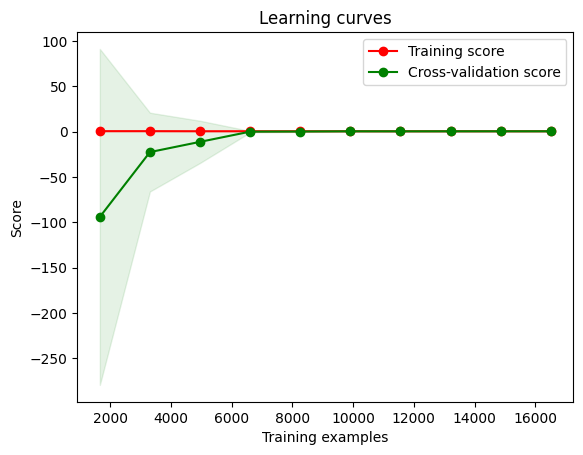

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(lin_reg, california.data, california.target, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curves')
plt.legend(loc="best")
plt.show()


Logistic Regression
1. Load the iris dataset and select only the first two features.


In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target == 0).astype(int)


2. Split the dataset into training and testing sets.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. Train the logistic regression model using the training set.


In [9]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

4. Evaluate the model using the testing set.


In [10]:
y_pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


1.0


5. Plot the decision boundary.


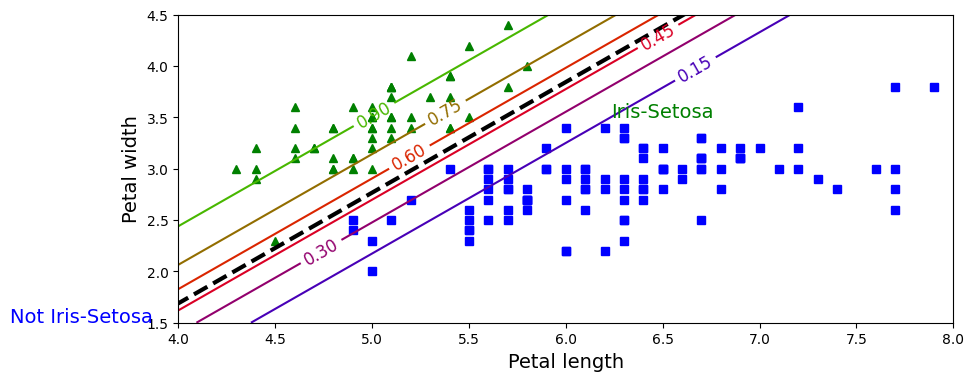

In [11]:
x0, x1 = np.meshgrid(
        np.linspace(4, 8, 500).reshape(-1, 1),
        np.linspace(1.5, 4.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Setosa", fontsize=14, color="b", ha="center")
plt.text(6.5, 3.5, "Iris-Setosa", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([4, 8, 1.5, 4.5])
plt.show()
